In [1]:
import seml
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from lataq.metrics.metrics import metrics
from lataq_reproduce.exp_dict import EXPERIMENT_INFO

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Get results for SCANVI, SCVI, MARS, SVM

In [2]:
results = {}

In [5]:
results['scanvi'] = seml.get_results('scanvi', to_data_frame=True)
for score in list(results['scanvi']['result.integration_scores'].loc[0].columns):
    results['scanvi'][f'result.{score}'] = results['scanvi']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['scanvi']['result.f1-score-macro'] = results['scanvi']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['scanvi']['result.f1-score-weighted'] = results['scanvi']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['scanvi'] = results['scanvi'][[
    'config.data',
    'result.reference_time',
    'result.query_time',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['scanvi'] = results['scanvi'].assign(method='scanvi')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [6]:
results['scvi'] = seml.get_results('scvi', to_data_frame=True)
for score in list(results['scvi']['result.integration_scores'].loc[0].columns):
    results['scvi'][f'result.{score}'] = results['scvi']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['scvi'] = results['scvi'][[
    'config.data',
    'result.reference_time',
    'result.query_time',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
]]
results['scvi'] = results['scvi'].assign(method='scvi')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [7]:
results['svm'] = seml.get_results('svm', to_data_frame=True)
results['svm']['result.f1-score-macro'] = results['svm']['result'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['svm']['result.f1-score-weighted'] = results['svm']['result'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['svm'] = results['svm'][[
    'config.data',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['svm'] = results['svm'].assign(method='svm')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [9]:
results['mars'] = seml.get_results('mars', to_data_frame=True).set_index('config.data')
results['mars']['result.integration_scores'] = seml.get_results(
    'mars_metrics', 
    to_data_frame=True).set_index('config.data')['result.integration_scores']
for score in list(results['mars']['result.integration_scores'].iloc[0].columns):
    results['mars'][f'result.{score}'] = results['mars']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['mars']['result.f1-score-macro'] = results['mars']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['mars']['result.f1-score-weighted'] = results['mars']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['mars'] = results['mars'].reset_index()
results['mars'] = results['mars'][[
    'config.data',
    'result.reference_time',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['mars'] = results['mars'].assign(method='mars')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

# Get best results from hyperopt

In [10]:
results_lataq = seml.get_results('hyperparam_fixed', to_data_frame=True)

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

In [11]:
results['tranvae'] = results_lataq[results_lataq['config.model']=='tranvae']
for score in list(results['tranvae']['result.integration_scores'].iloc[0].columns):
    results['tranvae'][f'result.{score}'] = results['tranvae']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['tranvae']['result.f1-score-macro'] = results['tranvae']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['tranvae']['result.f1-score-weighted'] = results['tranvae']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['tranvae'] = results['tranvae'][[
    'config.data',
    'result.ebm',
    'result.knn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['tranvae'] = results['tranvae'].assign(method='tranvae')
results['tranvae'] = (
    results['tranvae']
    .sort_values(by='result.f1-score-weighted')
    .groupby('config.data')
    .last()
    .reset_index()
)

<ipython-input-11-4e8dc88e9f0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['tranvae'][f'result.{score}'] = results['tranvae']['result.integration_scores'].apply(
<ipython-input-11-4e8dc88e9f0a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['tranvae']['result.f1-score-macro'] = results['tranvae']['result.classification_report_query'].apply(
<ipython-input-11-4e8dc88e9f0a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [12]:
results['embedcvae'] = results_lataq[results_lataq['config.model']=='embedcvae']
for score in list(results['embedcvae']['result.integration_scores'].iloc[0].columns):
    results['embedcvae'][f'result.{score}'] = results['embedcvae']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['embedcvae']['result.f1-score-macro'] = results['embedcvae']['result.classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['embedcvae']['result.f1-score-weighted'] = results['embedcvae']['result.classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['embedcvae'] = results['embedcvae'][[
    'config.data',
    'result.ebm',
    'result.knn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['embedcvae'] = results['embedcvae'].assign(method='embedcvae')
results['embedcvae'] = (
    results['embedcvae']
    .sort_values(by='result.f1-score-weighted')
    .groupby('config.data')
    .last()
    .reset_index()
)

<ipython-input-12-0041a85f938e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['embedcvae'][f'result.{score}'] = results['embedcvae']['result.integration_scores'].apply(
<ipython-input-12-0041a85f938e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['embedcvae']['result.f1-score-macro'] = results['embedcvae']['result.classification_report_query'].apply(
<ipython-input-12-0041a85f938e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

# Get results for symphony and seurat

In [13]:
r_scores = pd.read_pickle('seurat/result_seurat_symphony.pickle')


In [14]:
r_scores['method'][~r_scores['classification_report'].isna()] = 'seurat'

In [15]:
results['seurat'] = r_scores[r_scores['method'] == 'seurat']
results['symphony'] = r_scores[r_scores['method'] == 'symphony']

In [16]:
results['seurat']

,data,method,integration_scores,classification_report,classification_report_query
1,pancreas,seurat,PCR_batch graph_conn ebm knn 0...,full_precision full_recal...,precision recall f1-sc...
3,pbmc,seurat,PCR_batch graph_conn ebm knn 0 ...,full_precisi...,precision ...
5,scvelo,seurat,PCR_batch graph_conn ebm knn 0 ...,full_precision full_recall fu...,precision recall f1-score ...
7,lung,seurat,PCR_batch graph_conn ebm knn 0...,full_precision full_rec...,precision recall f1-...
9,tumor,seurat,PCR_batch graph_conn ebm knn 0 ...,full_...,preci...
11,brain,seurat,PCR_batch graph_conn ebm knn 0...,full_precision...,precision r...


In [18]:
results['seurat']

,config.data,config.method,result.integration_scores,result.classification_report,result.classification_report_query,result.PCR_batch,result.graph_conn,result.ebm,result.knn,result.f1-score-macro,result.f1-score-weighted
1,pancreas,seurat,PCR_batch graph_conn ebm knn 0...,full_precision full_recal...,precision recall f1-sc...,0.711562,0.984334,0.511797,0.874351,0.898567,0.966536
3,pbmc,seurat,PCR_batch graph_conn ebm knn 0 ...,full_precisi...,precision ...,0.735211,0.919143,0.483270,0.848164,0.618890,0.845350
5,scvelo,seurat,PCR_batch graph_conn ebm knn 0 ...,full_precision full_recall fu...,precision recall f1-score ...,0.000000,0.897504,0.582890,0.694040,0.549169,0.718111
7,lung,seurat,PCR_batch graph_conn ebm knn 0...,full_precision full_rec...,precision recall f1-...,0.000000,0.794133,0.150534,0.826236,0.554041,0.580921
9,tumor,seurat,PCR_batch graph_conn ebm knn 0 ...,full_...,preci...,0.000000,0.761353,0.369490,0.593028,0.547613,0.531304
11,brain,seurat,PCR_batch graph_conn ebm knn 0...,full_precision...,precision r...,0.274708,0.984805,0.169152,0.915573,0.654410,0.775595


In [17]:
for score in list(results['seurat']['integration_scores'].iloc[0].columns):
    results['seurat'][f'{score}'] = results['seurat']['integration_scores'].apply(
        lambda x: x[score]
    )
results['seurat']['f1-score-macro'] = results['seurat']['classification_report_query'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['seurat']['f1-score-weighted'] = results['seurat']['classification_report_query'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['seurat'].columns = [
    f'result.{x}' 
    if i > 1 
    else f'config.{x}'
    for i, x 
    in enumerate(
        results['seurat'].columns
    )
]
results['seurat'] = results['seurat'][[
    'config.data',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['seurat'] = results['seurat'].assign(method='seurat')

<ipython-input-17-5403c03ac93d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['seurat'][f'{score}'] = results['seurat']['integration_scores'].apply(
<ipython-input-17-5403c03ac93d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['seurat']['f1-score-macro'] = results['seurat']['classification_report_query'].apply(
<ipython-input-17-5403c03ac93d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

KeyError: "['result.NMI_cluster/label', 'result.ASW_label', 'result.ARI_cluster/label', 'result.isolated_label_silhouette', 'result.ASW_label/batch', 'result.isolated_label_F1'] not in index"

In [4]:
for score in list(results['symphony']['integration_scores'].iloc[0].columns):
    results['symphony'][f'{score}'] = results['symphony']['integration_scores'].apply(
        lambda x: x[score]
    )
results['symphony'].columns = [
    f'result.{x}' 
    if i > 1 
    else f'config.{x}'
    for i, x 
    in enumerate(
        results['symphony'].columns
    )
]
results['symphony'] = results['symphony'][[
    'config.data',
    'result.NMI_cluster/label',
    'result.ARI_cluster/label',
    'result.ASW_label',
    'result.ASW_label/batch',
    'result.PCR_batch',
    'result.isolated_label_F1',
    'result.isolated_label_silhouette',
    'result.graph_conn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['symphony'] = results['symphony'].assign(method='symphony')

KeyError: 'symphony'

In [32]:
results = pd.concat(results.values())

# Visualization

In [33]:
integration_methods = ['scanvi', 'scvi', 'seurat', 'symphony', 'tranvae', 'embedcvae']
classification_methods = ['scanvi', 'seurat', 'svm', 'mars', 'tranvae', 'embedcvae']

In [34]:
results

,config.data,result.reference_time,result.query_time,result.NMI_cluster/label,result.ARI_cluster/label,result.ASW_label,result.ASW_label/batch,result.PCR_batch,result.isolated_label_F1,result.isolated_label_silhouette,result.graph_conn,result.f1-score-macro,result.f1-score-weighted,method,result.ebm,result.knn,data,integration_scores,classification_report,classification_report_query
0,pancreas,317.143088,34.473750,0.925007,0.956810,0.642078,0.859664,0.689723,0.088889,0.732558,0.972021,0.649163,0.958074,scanvi,NaN,NaN,NaN,NaN,NaN,NaN
1,pbmc,499.772296,34.422926,0.886107,0.922633,0.609423,0.846884,0.828845,0.883403,0.614433,0.972589,0.703661,0.906488,scanvi,NaN,NaN,NaN,NaN,NaN,NaN
2,brain,1025.122338,815.017171,0.711047,0.557050,0.630465,0.780969,0.000000,0.975274,0.477262,0.984169,0.641736,0.853709,scanvi,NaN,NaN,NaN,NaN,NaN,NaN
3,scvelo,392.092804,102.498192,0.612339,0.483941,0.542472,0.924802,0.000000,0.775862,0.528821,0.980265,0.368820,0.546233,scanvi,NaN,NaN,NaN,NaN,NaN,NaN
4,tumor,1048.638364,629.124454,0.474573,0.256810,0.524101,0.850032,0.000000,0.822144,0.618706,0.921655,0.309493,0.453583,scanvi,NaN,NaN,NaN,NaN,NaN,NaN
5,lung,475.236262,129.740392,0.782365,0.623448,0.588686,0.797532,0.000000,0.850258,0.593251,0.971057,0.364673,0.542582,scanvi,NaN,NaN,NaN,NaN,NaN,NaN
0,pancreas,285.853608,32.014879,0.912890,0.948346,0.621550,0.856541,0.685620,0.099291,0.756864,0.978984,NaN,NaN,scvi,NaN,NaN,NaN,NaN,NaN,NaN
1,pbmc,413.317490,30.474135,0.805090,0.746734,0.574742,0.840671,0.852231,0.793523,0.617999,0.975619,NaN,NaN,scvi,NaN,NaN,NaN,NaN,NaN,NaN
2,brain,434.517675,747.045027,0.672500,0.470358,0.592615,0.772398,0.000000,0.933672,0.479791,0.983843,NaN,NaN,scvi,NaN,NaN,NaN,NaN,NaN,NaN
3,scvelo,357.856032,96.846723,0.516993,0.311159,0.529682,0.916221,0.000000,0.148148,0.542979,0.982021,NaN,NaN,scvi,NaN,NaN,NaN,NaN,NaN,NaN


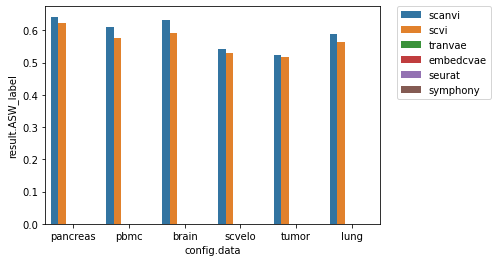

In [40]:
sns.barplot(
    x='config.data', 
    y='result.ASW_label', 
    hue='method', 
    data=results[results['method'].isin(integration_methods)]
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

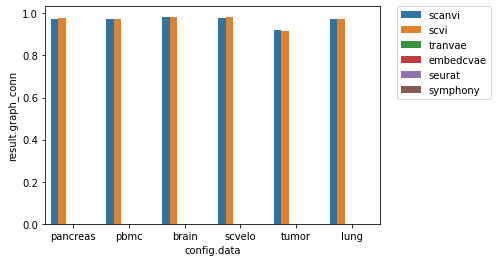

In [36]:
sns.barplot(
    x='config.data', 
    y='result.graph_conn', 
    hue='method', 
    data=results[results['method'].isin(integration_methods)]
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

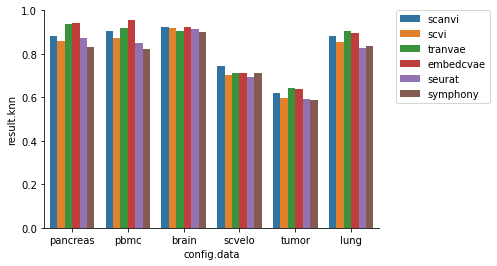

In [75]:
sns.barplot(
    x='config.data', 
    y='result.knn', 
    hue='method', 
    data=results[results['method'].isin(integration_methods)]
)
plt.ylim([0, 1])
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

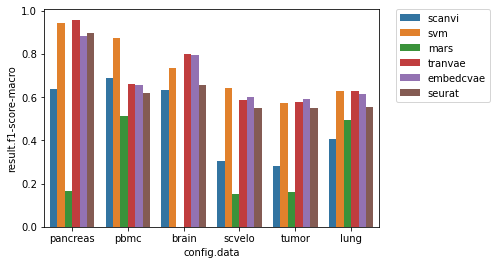

In [73]:
sns.barplot(
    x='config.data',
    y='result.f1-score-macro',
    hue='method',
    data=results[results['method'].isin(classification_methods)]
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

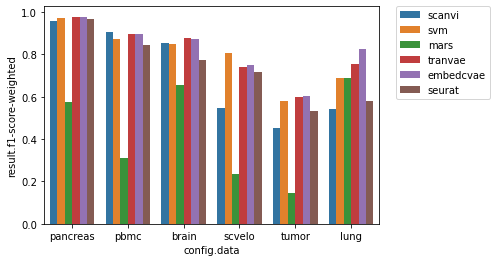

In [41]:
sns.barplot(
    x='config.data',
    y='result.f1-score-weighted',
    hue='method',
    data=results[results['method'].isin(classification_methods)]
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)